In [1]:
import matplotlib.pyplot as plt

In [2]:
# parse up the text file and pull everything out
file = open("res_all.txt", "r")

cont = True

runs = {}

while cont:
    line = file.readline()
    if line[:29] == "Running program with values L":
        q = int(line[39:])
        for i in range(5):
            line = file.readline()
        approx = float(line[23:-1])
        line = file.readline()
        true = float(line[23:-1])
        if float(true) != 0:
            runs[q] = {"q": q, "true": true, "approximation": approx, "ratio": float(approx)/float(true)}   
        else:
            runs[q] = {"q": q, "true": 0, "approximation": approx, "ratio": float(approx)/1}
        
        if q == 400:
            cont = False

file.close()
print(len(runs))

399


In [3]:
accuracy = []
true = []
approx = []
qs = []
diff = []
diff_qs = []
p_error = []
p_error_qs = []

for q in range (2,2001):
    qs.append(q)
    true.append(runs[q]["true"])
    approx.append(runs[q]["approximation"])
    accuracy.append(runs[q]["ratio"])

    if runs[q]["approximation"] and runs[q]["true"] and runs[q]["approximation"] - runs[q]["true"] > -0.005:
        diff.append(runs[q]["approximation"] - runs[q]["true"])
        diff_qs.append(q)
    else:
        print(runs[q])

    if runs[q]["true"] != 0:
        error = abs(runs[q]["approximation"] - runs[q]["true"]) / runs[q]["true"] * 100
        if error < 40:
            p_error_qs.append(q)
            p_error.append(error)
    else:
        error = abs((runs[q]["approximation"]+1) - (runs[q]["true"]+1)) / (runs[q]["true"]+1) * 100
        if error < 40:
            p_error_qs.append(q)
            p_error.append(error)

{'q': 2, 'true': 0, 'approximation': 0.0, 'ratio': 0.0}


KeyError: 401

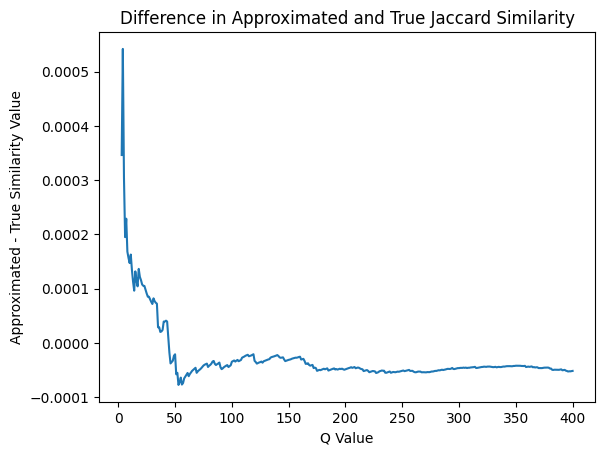

In [11]:
# plt.plot(qs, diff)
plt.plot(diff_qs, diff)
plt.title("Difference in Approximated and True Jaccard Similarity")
plt.xlabel("Q Value")
plt.ylabel("Approximated - True Similarity Value")
plt.savefig("graphics/raw_diff_1_sparse.png", dpi=500, bbox_inches='tight')

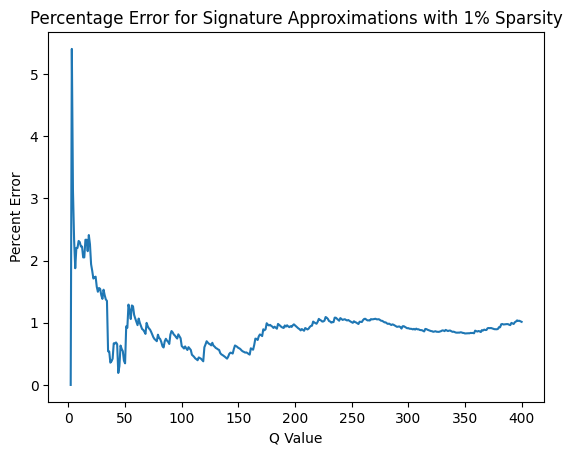

In [8]:
plt.plot(p_error_qs, p_error)
plt.title("Percentage Error for Signature Approximations with 1% Sparsity")
plt.xlabel("Q Value")
plt.ylabel("Percent Error")
plt.savefig("graphics/p_error_1_sparse.png", dpi=500)